## 8. Practice training a deep neural network on the CIFAR10 image dataset:

a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the Swish activation function.

In [9]:
import tensorflow as tf
import numpy as np 
from tensorflow import keras


170500096/170498071 [==============================] - 37s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [68]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    activation="swish",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [79]:
hidden_layers=[]
for layer in range(20):
    hidden_layers.append(tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'))

flatten_layer = tf.keras.layers.Flatten(input_shape=[32,32,3])
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(10, activation='softmax')

input_ = tf.keras.layers.Input(shape=[32,32,3])
flatten = flatten_layer(input_)
hidden=flatten
for layer in hidden_layers:
    hidden=layer(hidden)
concat = concat_layer([flatten,hidden])
output=output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

b. Using Nadam optimization and early stopping, train the network on
the CIFAR10 dataset.

In [80]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10
X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [50]:
X_train_full.shape

(50000, 32, 32, 3)

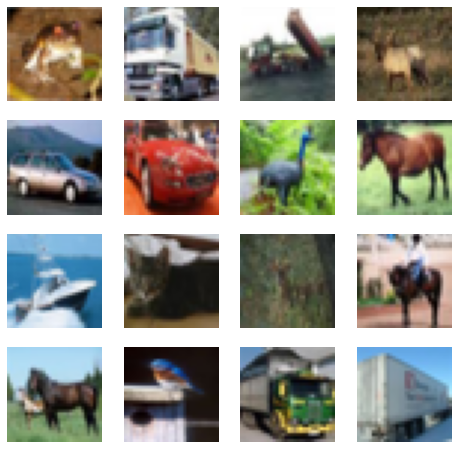

In [81]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_full[i])
    ax.axis('off')
plt.show()


In [83]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=['accuracy'])

In [89]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=20,
                                                restore_best_weights=True)
model_checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("my_cifar10_model",
                                                      save_best_only=True)

In [90]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs

In [91]:
history = model.fit(X_train,y_train, epochs = 20,
                    validation_data =(X_valid,y_valid),
                    callbacks=callbacks)

Epoch 1/20
1407/1407 [==============================] - 17s 12ms/step - loss: 44.0357 - accuracy: 0.2249 - val_loss: 37.3933 - val_accuracy: 0.2378
INFO:tensorflow:Assets written to: my_cifar10_model\assets
Epoch 2/20
1407/1407 [==============================] - 17s 12ms/step - loss: 33.4503 - accuracy: 0.2544 - val_loss: 39.9568 - val_accuracy: 0.2254
Epoch 3/20
1024/1407 [====================>.........] - ETA: 4s - loss: 28.7111 - accuracy: 0.2657